In [1]:
import nest
import matplotlib.pyplot as plt
from model.network import Network
import random


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Jul 22 2023 00:00:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Reset Kernel
nest.ResetKernel()
nest.update_time_limit = 10.

In [3]:
# Instantiate network
net = Network(180)

In [4]:
# Connect multimeter and spike recorder to all populations
net.connect_all_devices()

In [5]:
# Generate random feature vector
vector_length = 324
non_zero_elements = 81

# Create a binary vector with all elements set to 0
binary_vector = [0] * vector_length

# Set 81 randomly chosen positions to 1
positions_to_set = random.sample(range(vector_length), non_zero_elements)
for position in positions_to_set:
    binary_vector[position] = 1

print("Binary Vector:", binary_vector)

Binary Vector: [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]


In [6]:
# Input training signal to the network
net.input_train_signal(binary_vector)

Generating training signal...
...done.
Connecting input to the tc population...
... training signal successfully connected to the tc population.


In [7]:
# Run simulation
nest.Simulate(1000.0)


Jan 25 16:20:15 NodeManager::prepare_nodes [Info]: 
    Preparing 913 nodes for simulation.

Jan 25 16:20:15 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 913
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Jan 25 16:20:29 SimulationManager::run [Info]: 
    Simulation finished.


In [8]:
# Get events from multimeter
tc_vm = net.mult_tc.get()
vm_tc = tc_vm["events"]["V_m"]
ts_vm_tc = tc_vm["events"]["times"]

# Get events from spike recorder
tc_spike = net.spikes_tc.get("events")
send_tc = tc_spike["senders"]
ts_spike_tc = tc_spike["times"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


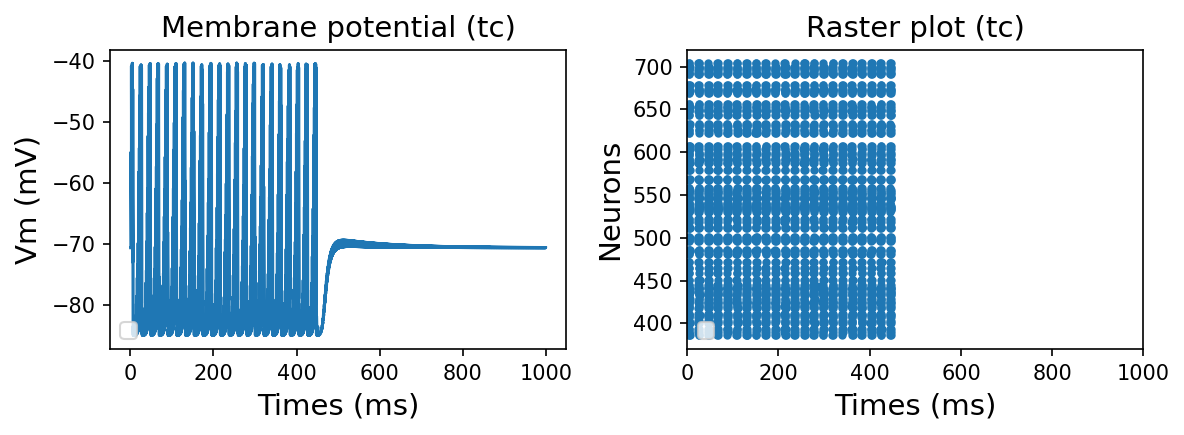

In [9]:
# Plot results

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)

axs[0].plot(ts_vm_tc, vm_tc)
axs[0].set_title('Membrane potential (tc)', size=14)
axs[0].legend(loc=3)
axs[0].set_xlabel("Times (ms)", size=14)
axs[0].set_ylabel("Vm (mV)", size=14)  # Fixed the ylabel, and "mV" is commonly used for millivolts

axs[1].plot(ts_spike_tc, send_tc, '.')
axs[1].set_title('Raster plot (tc)', size=14)
axs[1].legend(loc=3)
axs[1].set_xlabel("Times (ms)", size=14)
axs[1].set_xlim([0, 1000.0])
axs[1].set_ylabel("Neurons", size=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplot
#sns.despine()
plt.show()

In [10]:
id = nest.GetStatus(net.TC_POP[220], keys='global_id')[0]

In [11]:
id

601